<a href="https://colab.research.google.com/github/cesarodrigo21/Ejercicios-algoritmo-paralelo-y-distribuidos-2020-2/blob/main/Copia_de_Copia_de_Cesar_Rodrigo_Guia_Practica_sobre_Hilos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARALELISMO CON HILOS**

El siguiente código **identifica los hilos** utilizados. Las líneas 1-5 comentan el código siguiendo la estructura *input, procedimiento, output*

In [ ]:
#input: nro de hilos
#procedimiento:
# - Thread_worker() obtiene el nombre de un hilo con la función currentThread().getName() 
# - cada hilo llama a Thread_worker()
#output: Thread_worker() imprime el nombre del hilo tomado

import threading
  
THREADS_COUNT = 4

class Threaded_worker(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
    def run(self):
        threadName = threading.currentThread().getName() 
        print("Hola, Soy el thread(hilo) %s" % threadName)

print('Inicializando %d threads...' % THREADS_COUNT)
for i in range(THREADS_COUNT):
    td = Threaded_worker()
    td.start()


Inicializando 4 threads...
Hola, Soy el thread(hilo) Thread-16
Hola, Soy el thread(hilo) Thread-17
Hola, Soy el thread(hilo) Thread-18Hola, Soy el thread(hilo) Thread-19



El siguiente código utiliza la libreria **os** para nombras a los hilos como procesos. Analizar el código y comentarlo siguiendo la estructura *input-procedimiento-output*

In [ ]:
#input(): numero de procesos 
# procedimiento
#crea un modulo worker en donde  os.getpid() devolvera un valor entero que indica el identificador de proceso 
#cada proceso se llama a ltiprocessing.Process(target=worker, args=())
#output:  mostrara los procesos que hace el modulo 

import multiprocessing
import os

WORKER_NUMBER = 3

def worker():
    PID = os.getpid()
    print ("Hola, soy el proceso son PID %d" % PID)

print ('Inicializando %d procesos...' % WORKER_NUMBER)

jobs = []
for i in range(WORKER_NUMBER):
    p = multiprocessing.Process(target=worker, args=())
    jobs.append(p)
    p.start()

Inicializando 3 procesos...
Hola, soy el proceso son PID 127
Hola, soy el proceso son PID 128
Hola, soy el proceso son PID 131


En el siguiente código ¿Porqué el hilo 3 no se imprime?

In [ ]:
#el hilo 3 no se imprime porque cuando el contador de thread1 entrara al modulo solo hara dar 2 saltos 
#en la cual tendra una restriccion que es <3 
#lo mismo sera con el thread2 pero solo su valor 2 imprimira solo una vez
import threading
def cuenta(n,name):
    count=n
    while count<3:
      print("%s in count %s" % (name, count))
      count+=1

t = threading.Thread(target=cuenta, args=(1, 'thread1'))
t2 = threading.Thread(target=cuenta, args=(2, 'thread2'))
t3 = threading.Thread(target=cuenta, args=(3, 'thread3'))

t.start()
t2.start()
t3.start()


thread1 in count 0
thread1 in count 1
thread1 in count 2
thread2 in count 0
thread2 in count 1
thread2 in count 2
thread3 in count 0
thread3 in count 1
thread3 in count 2


A continuación vamos a usar la **función time** para verificar el tiempo de paralelización. El codigo a continuación imprime el inició y fin luego de x segundos

In [ ]:
import time

print ("Start : %s" % time.ctime())
time.sleep(4)
print ("End : %s" % time.ctime())


Start : Wed Dec  2 12:08:36 2020
End : Wed Dec  2 12:08:40 2020


El siguiente ejemplo da un espacio entre los hilos, lo cual se verifica con la función time. ¿Existe paralelismo aqui? explicar

In [ ]:
#no hay paralelismo por que  esta aumentando en dos segundos del  Thread-1 al Thread-2
#en este caso tendremos concurrencia
import threading
import time

def print_time(name):
    count = 0   
    print("inicio %s: %s. count %s" % ( name, time.ctime(), count))
    while count < 5:
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(time.time()), count))

        
t1 = threading.Thread(target=print_time, args=("Thread-1", ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", ) )

t1.start()
time.sleep(2)
t2.start()

inicio Thread-1: Wed Dec  2 12:03:38 2020. count 0
Thread-1: Wed Dec  2 12:03:38 2020. count 1
Thread-1: Wed Dec  2 12:03:38 2020. count 2
Thread-1: Wed Dec  2 12:03:38 2020. count 3
Thread-1: Wed Dec  2 12:03:38 2020. count 4
Thread-1: Wed Dec  2 12:03:38 2020. count 5
inicio Thread-2: Wed Dec  2 12:03:40 2020. count 0
Thread-2: Wed Dec  2 12:03:40 2020. count 1
Thread-2: Wed Dec  2 12:03:40 2020. count 2
Thread-2: Wed Dec  2 12:03:40 2020. count 3
Thread-2: Wed Dec  2 12:03:40 2020. count 4
Thread-2: Wed Dec  2 12:03:40 2020. count 5


**Problema propuesto:** 
Ejecute varias veces el código a continuación y explique al menos 2 resultados diferentes

In [ ]:
#input: datos t1 y t2 
#procedimiento:
# - modulo print_time en donde ( name, time.ctime(), count)) nos dara Thread1, con un tiempo actual, con un valor 0
# - mientras el contador sea menor a 5 entones time.sleep(n) donde n es el número de segundos que se suspenderá la ejecución.
# - haciendo que el contador en 0 aumente 1 en 1
#output: donde imprimira el ( name, time.ctime(), count) imprimira el Thread, el nuevo tiempo actual con suspension y nuevo contador

import threading
import time

def print_time(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n)
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(), count))

        
t1 = threading.Thread(target=print_time, args=("Thread-1", 2, ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", 4, ) )

t1.start()
t2.start()

# - Obeservacion del resultado

# al ejecutar el programa lo primero que nos mostrara sera los dos theread en tiempo actual
# al seguir ejecutando seguira dandonos el mismo tiempo actual pero con una diferencia
# de que  Thread-1 con una pausa de 2seg y Thread-2 en 4seg  no seran iguales entonces comenzara a entrar en el while con el theread-1
#analizara cuanto se demoro paso alcanzar al thread-2 lo mismo sera con el thread-2 que contara cuanto se paso al theread-1.
#saldra un nuevo resultado pero con  el nombre del thread que corresponda  y nos dara conecer en cuanto este debe alcanzar al otro thread.

Para el Hilo: Thread-1, en el momento: Wed Dec  2 21:05:53 2020, su valor de count es: 0
Para el Hilo: Thread-2, en el momento: Wed Dec  2 21:05:53 2020, su valor de count es: 0
Thread-1: Wed Dec  2 21:05:53 2020. count 1



## Ejemplo encontrado que se asemeja al problema propuesto
fuente: https://stackoverrun.com/es/q/619462

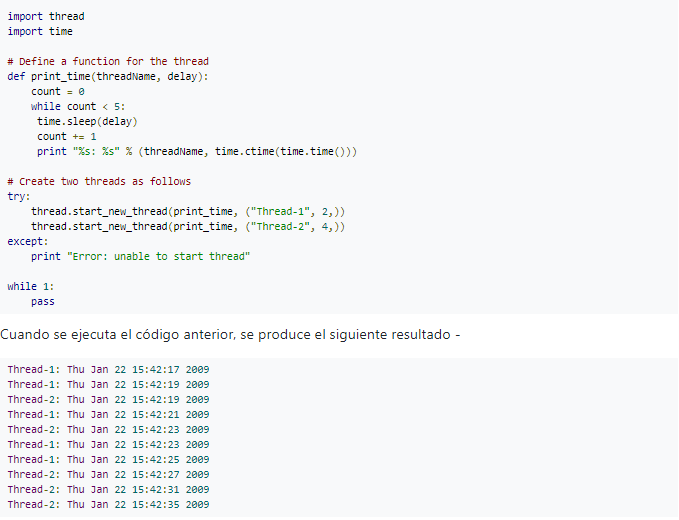

Fuentes: 
http://codigo-python.blogspot.com/2016/11/hilos-y-procesos-i.html

https://www.tutorialspoint.com/python3/time_sleep.htm

https://docs.python.org/es/3/library/threading.html#thread-objects

https://en.wikipedia.org/wiki/Flynn%27s_taxonomy

https://github.com/antonioam82/ejercicios-python